
## Importing all the Libraries.




In [ ]:
## Importing Basic Packages

import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 50)

# Importing Plotly Packages

import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

# Importing sklearn Packages

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

# Importing scipy Packages
from scipy.sparse.linalg import svds

In [ ]:
pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Calling the preprocessed csv file Business_tampa.

In [ ]:
Final_data = pd.read_csv("Business_tampa.csv")

In [ ]:
Final_data = Final_data.dropna(subset=['address']) 

In [ ]:
Final_data.drop(['Unnamed: 0'], axis=1, inplace = True)
print(Final_data.shape)
Final_data.head(3)

(1801, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
2,QjV4v7q_pt7tt3K1US7IHg,PDQ Temple Terrace,5112 E Fowler Ave,Tampa,FL,33617,28.054888,-82.399548,3.0,5,1,"{'RestaurantsReservations': 'False', 'Business...","Fast Food, Sandwiches, Chicken Shop, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
3,Ucl9Vo5lwrUmYbV8Dv8X5g,O'Briens Irish Pub,15435 N Dale Mabry Hwy,Tampa,FL,33618,28.092360,-82.500588,4.0,108,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Pubs, Nightlife, Arts & Entertainment, I...","{'Monday': '18:0-2:30', 'Tuesday': '15:0-1:0',..."
4,VVvUBlc_WIEb8obKGq39dA,Four Green Fields,"4100 George J Bean Pkwy, Airside E, Tampa Inte...",Tampa,FL,33607,27.980399,-82.537787,4.5,39,1,"{'OutdoorSeating': 'False', 'Alcohol': ""'full_...","Irish Pub, Bars, Restaurants, Irish, Nightlife","{'Monday': '5:0-21:30', 'Tuesday': '5:0-21:30'..."


In [ ]:
# Geographical Overview of Restaurants in Tampa City

px.set_mapbox_access_token("pk.eyJ1Ijoic2hyZWVlZWVlZWUiLCJhIjoiY2xnYjJ1NzlsMHZhbjNpcGMxeG1udzh3aiJ9.eZgavLTRVitsztwci8Hmgw")
fig = px.scatter_mapbox(Final_data, lat="latitude", lon="longitude", color="stars", size='review_count',title = "All the restraunts in Tampa City",
                   size_max=15, zoom=10, width=1000, height=700)

fig.update_layout(mapbox_style="light")
fig.show()

## Clustering problem.

In [ ]:
location = Final_data[['longitude','latitude']]
location 

,longitude,latitude
2,-82.399548,28.054888
3,-82.500588,28.092360
4,-82.537787,27.980399
5,-82.537423,27.976775
6,-82.457824,27.944457
...,...,...
1815,-82.469374,27.940550
1816,-82.479585,28.057322
1817,-82.565400,27.996400
1818,-82.582649,27.997949


In [ ]:
distortions = []     ### here we are going to use k means clustering algorirthm to check how it performs with k values.
K = range(1,15)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(location)
    distortions.append(kmeansModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

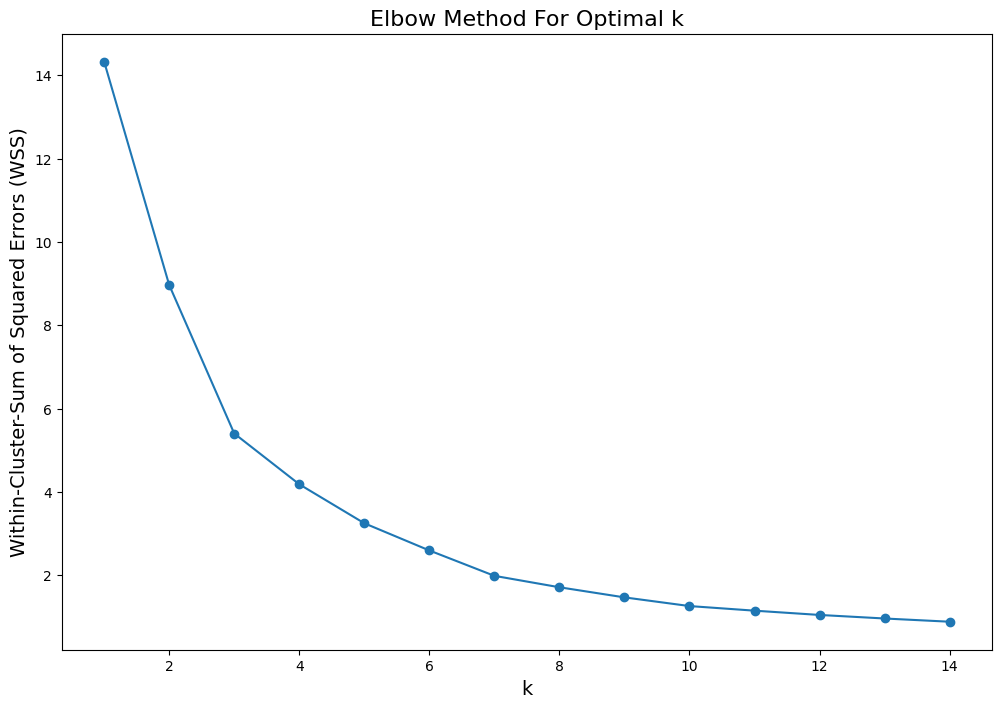

In [ ]:
# Elbow Graph for WSS

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k', fontsize = 14)
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)', fontsize = 14)
plt.title('Elbow Method For Optimal k', fontsize = 16)
plt.show()

Above graph shows that the optimal value for the k-means clusteringa algorithm would be 4.

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(location)
y = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
Final_data['cluster'] = kmeans.predict(Final_data[['longitude','latitude']])
Final_data.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,cluster
2,QjV4v7q_pt7tt3K1US7IHg,PDQ Temple Terrace,5112 E Fowler Ave,Tampa,FL,33617,28.054888,-82.399548,3.0,5,1,"{'RestaurantsReservations': 'False', 'Business...","Fast Food, Sandwiches, Chicken Shop, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",3
3,Ucl9Vo5lwrUmYbV8Dv8X5g,O'Briens Irish Pub,15435 N Dale Mabry Hwy,Tampa,FL,33618,28.092360,-82.500588,4.0,108,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Pubs, Nightlife, Arts & Entertainment, I...","{'Monday': '18:0-2:30', 'Tuesday': '15:0-1:0',...",0
4,VVvUBlc_WIEb8obKGq39dA,Four Green Fields,"4100 George J Bean Pkwy, Airside E, Tampa Inte...",Tampa,FL,33607,27.980399,-82.537787,4.5,39,1,"{'OutdoorSeating': 'False', 'Alcohol': ""'full_...","Irish Pub, Bars, Restaurants, Irish, Nightlife","{'Monday': '5:0-21:30', 'Tuesday': '5:0-21:30'...",1


In [ ]:
#Geographical Plot of 4 Clusters

px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(Final_data, lat="latitude", lon="longitude", color="cluster", size='review_count',title= 'Distribution of Restraunts in Tampa with K=4', 
                  hover_data= ['name', 'latitude', 'longitude'], zoom=10, width=1000, height=700)

fig.update_layout(mapbox_style="light")

fig.show()

 Although the optimal numbber is supposed to be right but for the purpose of recommendation system we think that more clusters would a better choice as it would be for a smaller area. 

In [ ]:

#changing the value to 12
kmeans = KMeans(n_clusters = 12, init = 'k-means++')
kmeans.fit(location)
y = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
Final_data['cluster'] = kmeans.predict(Final_data[['longitude','latitude']])
Final_data.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,cluster
2,QjV4v7q_pt7tt3K1US7IHg,PDQ Temple Terrace,5112 E Fowler Ave,Tampa,FL,33617,28.054888,-82.399548,3.0,5,1,"{'RestaurantsReservations': 'False', 'Business...","Fast Food, Sandwiches, Chicken Shop, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",3
3,Ucl9Vo5lwrUmYbV8Dv8X5g,O'Briens Irish Pub,15435 N Dale Mabry Hwy,Tampa,FL,33618,28.092360,-82.500588,4.0,108,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Pubs, Nightlife, Arts & Entertainment, I...","{'Monday': '18:0-2:30', 'Tuesday': '15:0-1:0',...",7


In [ ]:
#Geographical Plot of 12 Clusters

px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(Final_data, lat="latitude", lon="longitude", color="cluster", size='review_count',title= 'Distribution of Restraunts in Tampa with K=12', 
                  hover_data= ['name', 'latitude', 'longitude'], zoom=10, width=1000, height=700)

fig.update_layout(mapbox_style="light")
fig.show()

 On the basis of Distance, the above are the appropriate results. However, our recommnedations are also should also be based on the ratings of the restraunts. 

In [ ]:
nearby_best = Final_data.sort_values(by=['stars', 'review_count'], ascending=False)
nearby_best.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,cluster
1519,BZyxr4ocl1hJvFvhlogz0Q,Sulphur Springs Sandwiches Shop,"9000 N Florida Ave, Ste A",Tampa,FL,33604,28.031181,-82.459783,5.0,336,1,"{'HappyHour': 'False', 'OutdoorSeating': 'Fals...","Sandwiches, Vegetarian, Delis, Cafes, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ...",9
1674,1N9WC6FwF8MSc7BHbIP35A,Vegan International Co. Kitchen & Market,13751 N Nebraska Ave,Tampa,FL,33613,28.072208,-82.450741,5.0,269,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Desserts, Restaurants, Vegan, Food, Sandwiches...","{'Monday': '0:0-0:0', 'Wednesday': '11:0-17:0'...",3


In [ ]:
def location_based_recommendation(df, latitude, longitude):
    
    """Predict the cluster for longitude and latitude provided"""
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print("This restaurant belongs to cluster:", cluster)
   
    """Get the best restaurant in this cluster along with the relevant information for a user to make a decision"""
    return df[df['cluster']==cluster].iloc[0:10][['name', 'latitude','longitude','categories','stars', 'review_count','cluster']]

In [ ]:
# Busch gardens 37.234070, -76.645714.
# Florida gardens 27.944227,  -82.445175
# Zoo tampa 28.01331, -82.46972

### Some Prime Locations in Tampa

In [ ]:
test_coordinates = {                                      ### This is a test run to check how our model is performing in terms of geolocating the top ten restraunts.
    'user': [1, 2, 3], 
    'latitude' : [37.234070, 27.944227, 28.01331],
    'longitude' : [-76.645714, -82.445175, -82.46972],
}

test_df = pd.DataFrame(test_coordinates)
test_df

,user,latitude,longitude
0,1,37.234070,-76.645714
1,2,27.944227,-82.445175
2,3,28.013310,-82.469720


In [ ]:
# Example 1:  Busch Gardens

user1 = test_df[test_df['user'] == 1]
user1
# # Example 2: Florida gardens

user2 = test_df[test_df['user'] == 2]
user2
# Example 1:  Zoo tampa

user3 = test_df[test_df['user'] == 3]
user3

,user,latitude,longitude
2,3,28.01331,-82.46972


In [ ]:
# Top 10 Recommended Restaurants based on Location at Busch Gardens

location_based_recommendation(nearby_best, user1.latitude, user1.longitude)

This restaurant belongs to cluster: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude,categories,stars,review_count,cluster
15,Island Fin Poké,28.169016,-82.356628,"Gluten-Free, Poke, Food, Restaurants, Hawaiian",5.0,88,2
442,Ice Spice Cafe,28.163400,-82.354301,"Restaurants, Food, Indian, Desserts, Juice Bar...",5.0,31,2
1031,Patriot Brew Cafe,28.069971,-82.357316,"Food, Restaurants, Cafes, Coffee & Tea",5.0,5,2
257,Sushi Cafe,28.131122,-82.365784,"Sushi Bars, Japanese, Restaurants",4.5,291,2
1356,Las Palmas Latin Grill,28.169364,-82.355237,"Sandwiches, Restaurants, Cuban, Food Trucks, C...",4.5,210,2
218,Michi Ramen,28.131839,-82.365154,"Noodles, Seafood, Ramen, Restaurants, Japanese...",4.5,148,2
474,Oronzo Italian,28.130239,-82.367734,"Salad, Soup, Italian, Restaurants, Pizza",4.5,110,2
327,Al-Sham Palace,28.153027,-82.352353,"Restaurants, Chicken Wings, Mediterranean, Des...",4.5,102,2
1743,Palm Thai,28.118402,-82.381671,"Thai, Restaurants",4.5,96,2
819,Capri Pizza-N-More,28.144255,-82.312745,"Pasta Shops, Pizza, Restaurants, Food, Special...",4.5,63,2


In [ ]:
# Top 10 Recommended Restaurants based on Location at Florida Gardens

location_based_recommendation(nearby_best, user2.latitude, user2.longitude)

This restaurant belongs to cluster: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude,categories,stars,review_count,cluster
714,Yolk White & Associates,27.945465,-82.458814,"Food Stands, Restaurants, Food, Coffee & Tea, ...",5.0,229,0
1815,Jet City Espresso Hyde Park,27.940550,-82.469374,"Coffee & Tea, Food, Juice Bars & Smoothies, Sp...",5.0,152,0
644,Flan Factory,27.960155,-82.451424,"Restaurants, Latin American, Sandwiches, Cuban...",5.0,129,0
551,Eat Right,27.952656,-82.459320,"Personal Chefs, Food Delivery Services, Event ...",5.0,45,0
1014,Meanchi's Peruvian Inspired Sandwiches,27.946374,-82.476415,"Restaurants, Food Trucks, Food, Sandwiches, Pe...",5.0,31,0
564,Fit Bowl,27.927064,-82.453899,"Food, Pop-up Shops, Acai Bowls, Juice Bars & S...",5.0,17,0
1073,Black Radish Grocer,27.970431,-82.446872,"Vegan, Restaurants, Organic Stores, Specialty ...",5.0,17,0
1083,Moon Frog Arepas,27.948079,-82.457129,"Event Planning & Services, Food, Food Trucks, ...",5.0,16,0
268,Junmai Station,27.948132,-82.456689,"Food, Street Vendors, Japanese, Restaurants",5.0,9,0
878,Unks Bar B Que,27.946471,-82.474863,"Food, Street Vendors, Barbeque, Restaurants",5.0,9,0


In [ ]:
# Top 10 Recommended Restaurants based on Location at Zoo tampa

location_based_recommendation(nearby_best, user3.latitude, user3.longitude)

This restaurant belongs to cluster: 9


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude,categories,stars,review_count,cluster
1519,Sulphur Springs Sandwiches Shop,28.031181,-82.459783,"Sandwiches, Vegetarian, Delis, Cafes, Restaura...",5.0,336,9
1390,Xtreme Tacos - Seminole Heights,27.998617,-82.450959,"Tacos, Mexican, Restaurants",5.0,145,9
1638,Spaddy's Coffee,27.994211,-82.459636,"Breakfast & Brunch, Coffee & Tea, Food, Food T...",5.0,131,9
700,Gulf Coast Sourdough & Wild Yeast Breads,28.008282,-82.459212,"Grocery, Food, Street Vendors, Bakeries, Resta...",5.0,71,9
805,Rene’s Mexican Kitchen,27.985734,-82.451147,"Restaurants, Event Planning & Services, Catere...",5.0,49,9
349,New World Brewery,28.032412,-82.452469,"Bars, Pizza, Nightlife, Restaurants, Arts & En...",5.0,32,9
1740,Ranchero Tacos,27.990777,-82.459257,"Mexican, Restaurants, Food, Tacos, Food Trucks",5.0,17,9
272,Mel's House Of Smoke BBQ & Catering,28.031316,-82.451534,"Restaurants, Barbeque, Food Trucks, Event Plan...",5.0,11,9
670,Rocky’s Tacos,27.996280,-82.473097,"Food, Street Vendors, Food Trucks, Mexican, Re...",5.0,10,9
1155,La Mini Super Market,28.025014,-82.469242,"Specialty Food, International Grocery, Restaur...",5.0,6,9


In [ ]:
# Geographical Plot of Nearby Recommended Restaurants from Busch gardens

px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(location_based_recommendation(nearby_best, user1.latitude, user1.longitude), lat="latitude", lon="longitude",  
                   zoom=10, width=1000, height=700, hover_data= ['name', 'latitude', 'longitude', 'categories', 'stars', 'review_count'],title= 'Restraunts closest to Busch gardens')
fig.add_scattermapbox(lat=user1["latitude"], lon= user1["longitude"]).update_traces(dict(mode='markers', marker = dict(size = 15)))
fig.update_layout(mapbox_style="light")

This restaurant belongs to cluster: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



In [ ]:
# Geographical Plot of Nearby Recommended Restaurants from Florida gardens

px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(location_based_recommendation(nearby_best, user2.latitude, user2.longitude), lat="latitude", lon="longitude",  
                   zoom=10, width=1000, height=700, hover_data= ['name', 'latitude', 'longitude', 'categories', 'stars', 'review_count'],title= 'Restraunts closest to Florida gardens')
fig.add_scattermapbox(lat=user1["latitude"], lon= user1["longitude"]).update_traces(dict(mode='markers', marker = dict(size = 15)))
fig.update_layout(mapbox_style="light")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



This restaurant belongs to cluster: 0


In [ ]:
# Geographical Plot of Nearby Recommended Restaurants from Zoo Tampa

px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(location_based_recommendation(nearby_best, user3.latitude, user3.longitude), lat="latitude", lon="longitude",  
                   zoom=10, width=1000, height=700, hover_data= ['name', 'latitude', 'longitude', 'categories', 'stars', 'review_count'],title = "Restaurants closest to Zoo Tampa ")
fig.add_scattermapbox(lat=user1["latitude"], lon= user1["longitude"]).update_traces(dict(mode='markers', marker = dict(size = 15)))
fig.update_layout(mapbox_style="light")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



This restaurant belongs to cluster: 9


In [ ]:
pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Below file is the code for creating a web interface in streamlit. Later we can use this web app to show our results to everyone through a URL link.  


In [ ]:
%%writefile Yelp_App.py                                 
                                                        #this code is available in a seperate Python file but if someone wants to run 
                                                        # but If someone wants to run everything through one file they can use this one.
#importing librarires
import pandas as pd
import numpy as np
import streamlit as st
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 50)

# Importing Plotly Packages

import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

# Importing sklearn Packages

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

# Importing scipy Packages
#from scipy.sparse.linalg import svds
#from haversine import haversine, Unit

import streamlit as st
import pandas as pd
import plotly.express as px
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px





# Importing sklearn Packages

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

# Importing scipy Packages
#from scipy.sparse.linalg import svds
#from haversine import haversine, Unit

import streamlit as st
import pandas as pd
import plotly.express as px

import base64
def add_bg_from_local(image_file):
    with open(image_file, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
    st.markdown(
    f"""
    <style>
    .stApp {{
        background-image: url(data:image/{"jpg"};base64,{encoded_string.decode()});
        background-size: cover
    }}
    </style>
    """,
    unsafe_allow_html=True
    )
add_bg_from_local('color.jpg')

# Load Yelp data into a DataFrame
Final_data = pd.read_csv("Business_tampa.csv")
Final_data.drop(['Unnamed: 0'], axis=1, inplace = True)
Final_data = Final_data.dropna(subset=['address'])
location = Final_data[['longitude','latitude']]
distortions = []
K = range(1,15)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(location)
    distortions.append(kmeansModel.inertia_)
kmeans = KMeans(n_clusters = 12, init = 'k-means++')
kmeans.fit(location)
y = kmeans.labels_

user_list = Final_data[['address','longitude','latitude']]

Final_data['cluster'] = kmeans.predict(Final_data[['longitude','latitude']])
nearby_best = Final_data.sort_values(by=['stars', 'review_count'], ascending=False)

def location_based_recommendation(df, latitude, longitude):
    """Predict the cluster for longitude and latitude provided"""
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print("This restaurant belongs to cluster:", cluster)
  
    """Get the best restaurant in this cluster along with the relevant information for a user to make a decision"""
    return df[df['cluster']==cluster].iloc[0:10][['name', 'latitude','longitude','categories','stars', 'review_count','cluster']]

# Create a sidebar with two tabs: Table and Map
st.sidebar.title("Location-Based Recommendation system")
st.sidebar.write("Here you can select the type of graph you want to view!")
tabs = ["Customizable recommendations","Table View", "Map View"]
selected_tab = st.sidebar.radio("", tabs)

if selected_tab == "Customizable recommendations":
    st.title("About the Recommendation sytem")
    st.write("This location-based recommendation system is a powerful tool that harnesses the vast amount of Yelp data to provide personalized recommendations to users based on their location. With a sleek and intuitive interface, users can easily select their address and receive a tailored list of the top ten restaurants in their vicinity. Whether viewing the results in a table format or on an interactive map powered by Mapbox, this system provides an engaging and user-friendly experience. Powered by cutting-edge machine learning algorithms, this recommendation system is a must-have for foodies and restaurant enthusiasts looking to discover new and exciting dining options in Florida.")
    filtered_df = Final_data

    # Filters
    review_count_slider = st.slider("Filter by review count", 0, 200, 0, 20)
    stars_slider = st.slider("Filter by stars", 1.0, 5.0, 1.0, 0.1)
    #categories_input = st.selectbox("Filter by categories", filtered_df['categories'])

    if review_count_slider > 0:
        filtered_df = filtered_df[filtered_df["review_count"] >= review_count_slider]
    if stars_slider > 1.0:
        filtered_df = filtered_df[filtered_df["stars"] >= stars_slider]
    



    st.write("Showing results for filters:")
    st.write("- Review count >= ", review_count_slider)
    st.write("- Stars >= ", stars_slider)
    


    st.write("Total number of results:", len(filtered_df))

    fig = px.scatter_mapbox(
        filtered_df, 
        lat="latitude", 
        lon="longitude", 
        hover_name="name", 
        hover_data=["stars", "review_count", "categories"],
        zoom=10,
        height=600
    )

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    st.plotly_chart(fig)

# Show Table tab
if selected_tab == "Table View":
    st.title('Table view')
    st.write("Your Top 10 recommendations in a table format for the selected location.")
    # Create a selectbox to select the address from the user_list dataframe
    selected_address = st.selectbox('Select an address', user_list['address'])

    # Get the longitude and latitude corresponding to the selected address
    longitude = user_list.loc[user_list['address'] == selected_address, 'longitude'].values[0]
    latitude = user_list.loc[user_list['address'] == selected_address, 'latitude'].values[0]

    # Call the location_based_recommendation function with the selected longitude and latitude
    result = location_based_recommendation(nearby_best, latitude, longitude)

    st.table(result)

# Show Map tab
elif selected_tab == "Map View":
    st.title('Map view')
    st.write("Your Top 10 recommendations in a Visual format for the selected location.")
    # Create a selectbox to select the address from the user_list dataframe
    selected_address = st.selectbox('Select an address', user_list['address'])

    # Get the longitude and latitude corresponding to the selected address
    longitude = user_list.loc[user_list['address'] == selected_address, 'longitude'].values[0]
    latitude = user_list.loc[user_list['address'] == selected_address, 'latitude'].values[0]

    # Call the location_based_recommendation function with the selected longitude and latitude
    result = location_based_recommendation(nearby_best, latitude, longitude)

    # Show Map using plotly express
    fig = px.scatter_mapbox(result, lat="latitude", lon="longitude", hover_name="name", hover_data=["categories", "stars", "review_count"],
                            color_discrete_sequence=["red"], zoom=10, height=600)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    st.plotly_chart(fig)
   


    

Overwriting Yelp_App.py


In [ ]:
!streamlit run Yelp_App.py & npx localtunnel --port 8501

[##................] - fetchMetadata: sill resolveWithNewModule escalade@3.1.1


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.255.44:8501

npx: installed 22 in 4.714s
your url is: https://huge-frogs-return.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/clust

In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
^C
